# Hierarchical Clustering

In [23]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [24]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

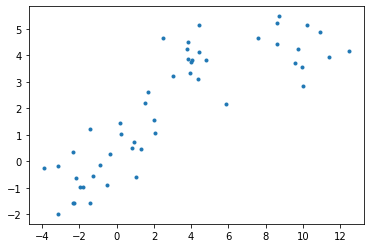

In [25]:
plt.scatter(X1[:, 0], X1[:, 1], marker='.') 

# Agglomerative Clustering

The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4
linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
Value will be: 'complete'
Note: It is recommended you try everything with 'average' as well

In [26]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [27]:
agglom.labels_

array([1, 0, 1, 1, 0, 3, 3, 2, 1, 0, 0, 3, 0, 2, 2, 2, 3, 1, 0, 2, 1, 0,
       0, 1, 3, 2, 2, 1, 0, 0, 1, 1, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 3, 2,
       2, 0, 3, 3, 0, 2])

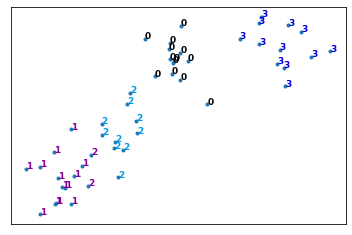

In [28]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])

plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [29]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.88631761 0.21253497 ... 0.56027607 0.84534202 1.03386724]
 [0.88631761 0.         0.67507488 ... 0.33307864 0.18079684 0.31262643]
 [0.21253497 0.67507488 0.         ... 0.34774114 0.63444566 0.82626916]
 ...
 [0.56027607 0.33307864 0.34774114 ... 0.         0.29443276 0.49561141]
 [0.84534202 0.18079684 0.63444566 ... 0.29443276 0.         0.20462897]
 [1.03386724 0.31262643 0.82626916 ... 0.49561141 0.20462897 0.        ]]


In [30]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-30-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


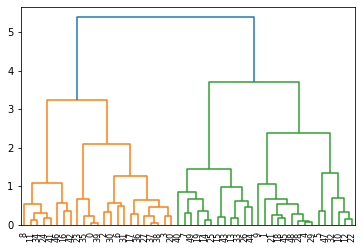

In [31]:
dendro = hierarchy.dendrogram(Z)

<ipython-input-32-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


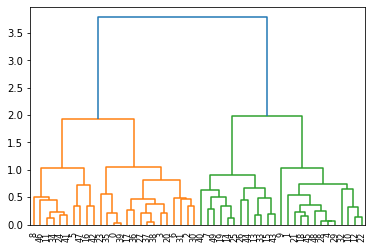

In [32]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

# Clustering on Vehicle dataset

In [40]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv')
print(data.shape)
data.head()

(159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [41]:
print("Size of dataset:", data.size)

Size of dataset: 2544


In [42]:
old_data = data
data = old_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


#### Data cleaning

In [43]:
print ("Shape of dataset before cleaning: ", data.size)
num_cols = ['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']
data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')
print("Number of null values in df:\n{0}".format(data.isnull().sum()))

data = data.dropna()
data = data.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", data.size)
data.head(5)

Shape of dataset before cleaning:  2544
Number of null values in df:
manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler
X = data[num_cols].values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(X)
feature_mtx [0:5]

array([[0.0311018 , 0.17951595, 0.        , 0.16717781, 0.11428571,
        0.21518987, 0.18655098, 0.28143713, 0.30625832, 0.2310559 ,
        0.13364055, 0.43333333, 0.59235294],
       [0.07266894, 0.2358551 , 0.        , 0.26122811, 0.31428571,
        0.43037975, 0.3362256 , 0.46107784, 0.5792277 , 0.50372671,
        0.31797235, 0.33333333, 0.69176471],
       [0.0156869 , 0.39373297, 0.        , 0.4466026 , 0.35714286,
        0.39240506, 0.47722343, 0.52694611, 0.62849534, 0.60714286,
        0.35483871, 0.23333333, 0.51258824],
       [0.03753717, 0.27400224, 0.        , 0.2011177 , 0.11428571,
        0.24050633, 0.21691974, 0.33532934, 0.38082557, 0.34254658,
        0.28110599, 0.4       , 0.61435294],
       [0.03454522, 0.29483892, 0.        , 0.33687726, 0.25714286,
        0.36708861, 0.34924078, 0.80838323, 0.56724368, 0.5173913 ,
        0.37788018, 0.23333333, 0.60470588]])

## Clustering using Scipy

In [45]:
import scipy

In [46]:
leng = feature_mtx.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])
D

<ipython-input-46-7600eb077161>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


array([[0.        , 0.59787114, 0.83661451, ..., 0.31996838, 0.25920737,
        0.24025877],
       [0.59787114, 0.        , 0.38290918, ..., 0.37924404, 0.69774142,
        0.68932747],
       [0.83661451, 0.38290918, 0.        , ..., 0.66453883, 0.89637757,
        0.88706071],
       ...,
       [0.31996838, 0.37924404, 0.66453883, ..., 0.        , 0.46874554,
        0.45520256],
       [0.25920737, 0.69774142, 0.89637757, ..., 0.46874554, 0.        ,
        0.17428161],
       [0.24025877, 0.68932747, 0.88706071, ..., 0.45520256, 0.17428161,
        0.        ]])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:

- single
- complete
- average
- weighted
- centroid

We use complete for our case, but feel free to change it to see how the results change.

In [47]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-47-8655000d21de>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


Essentially, Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. So you can use a cutting line:

In [48]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 4,  5,  3,  7,  3, 13,  7,  3,  5,  5,  3,  5,  3,  3,  5,  4,  7,
        5,  5,  5,  1,  4, 16,  7,  7,  5,  7,  3,  4,  7,  7, 15,  9,  8,
        8, 11, 11,  4,  7,  7,  6,  1, 12, 11,  8, 11,  9,  4,  6, 10, 12,
       12,  4,  4,  7,  5, 10, 10, 12,  5,  3,  1,  3,  1,  4,  7,  7,  5,
        2, 12, 10,  7,  7,  5,  1, 12, 12,  7,  1, 13, 14,  4,  7,  5, 12,
       12,  7,  3, 12, 12,  4,  7, 12,  7,  7,  5,  5,  5,  2, 14, 14,  4,
        4,  4,  4,  6,  5,  4, 10, 10, 10,  8,  4,  4,  7,  4,  4],
      dtype=int32)

In [49]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 3,
       2, 3, 2, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 4, 4, 1, 1, 1, 3, 3, 1, 1,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 2, 1, 1, 1, 1, 1], dtype=int32)

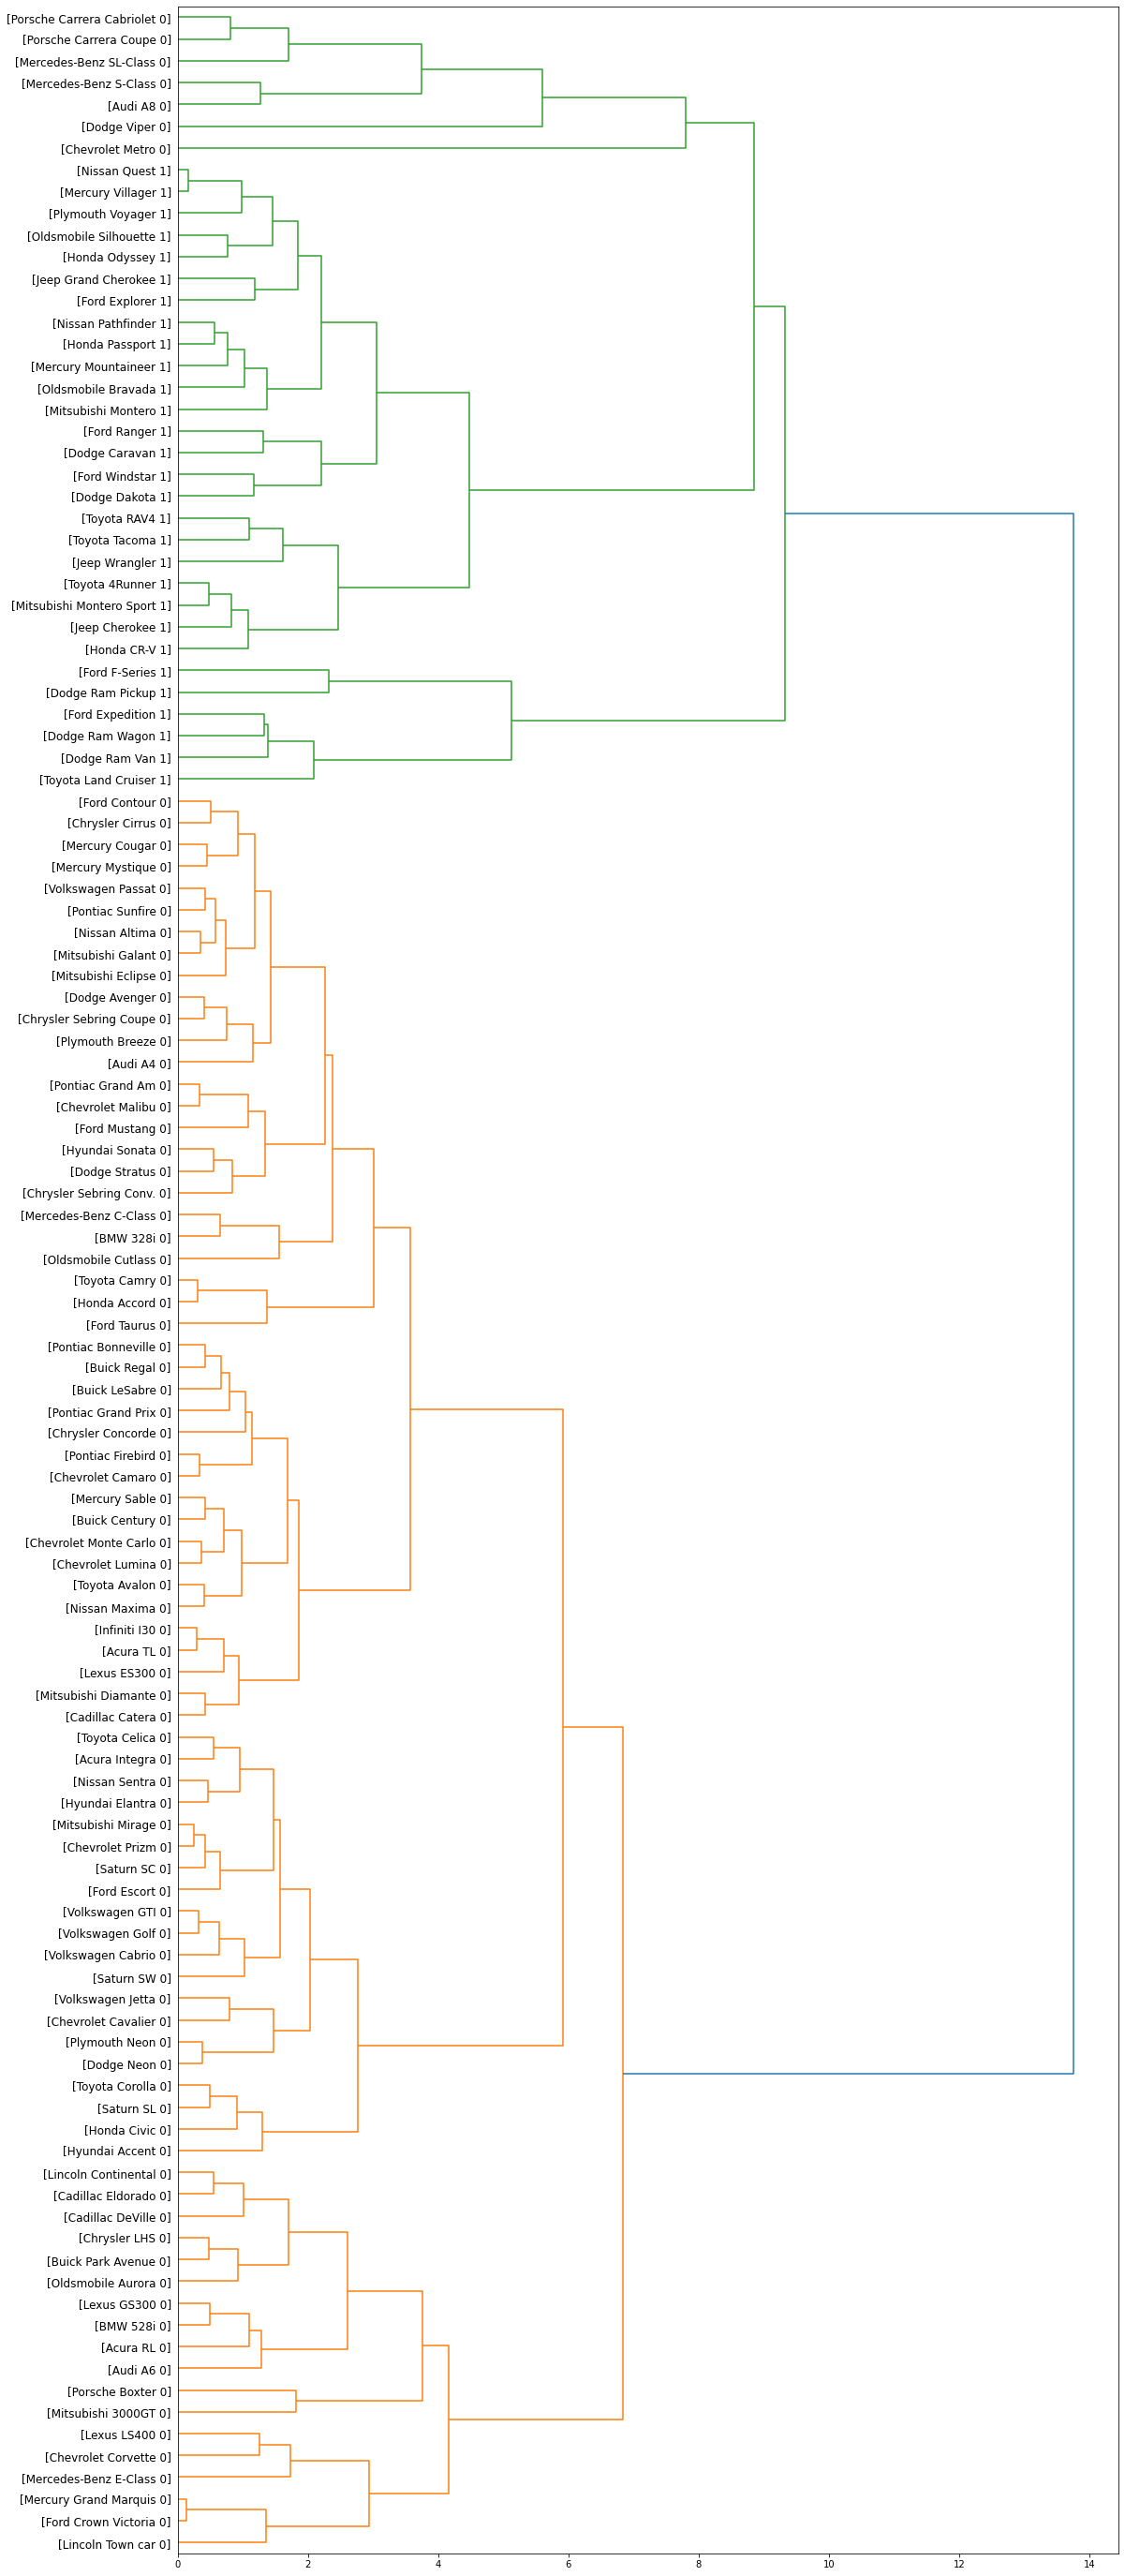

In [51]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['manufact'][id], data['model'][id], int(float(data['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## Clustering using scikit-learn

In [52]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.59787114 0.83661451 ... 0.31996838 0.25920737 0.24025877]
 [0.59787114 0.         0.38290918 ... 0.37924404 0.69774142 0.68932747]
 [0.83661451 0.38290918 0.         ... 0.66453883 0.89637757 0.88706071]
 ...
 [0.31996838 0.37924404 0.66453883 ... 0.         0.46874554 0.45520256]
 [0.25920737 0.69774142 0.89637757 ... 0.46874554 0.         0.17428161]
 [0.24025877 0.68932747 0.88706071 ... 0.45520256 0.17428161 0.        ]]


In [53]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-53-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


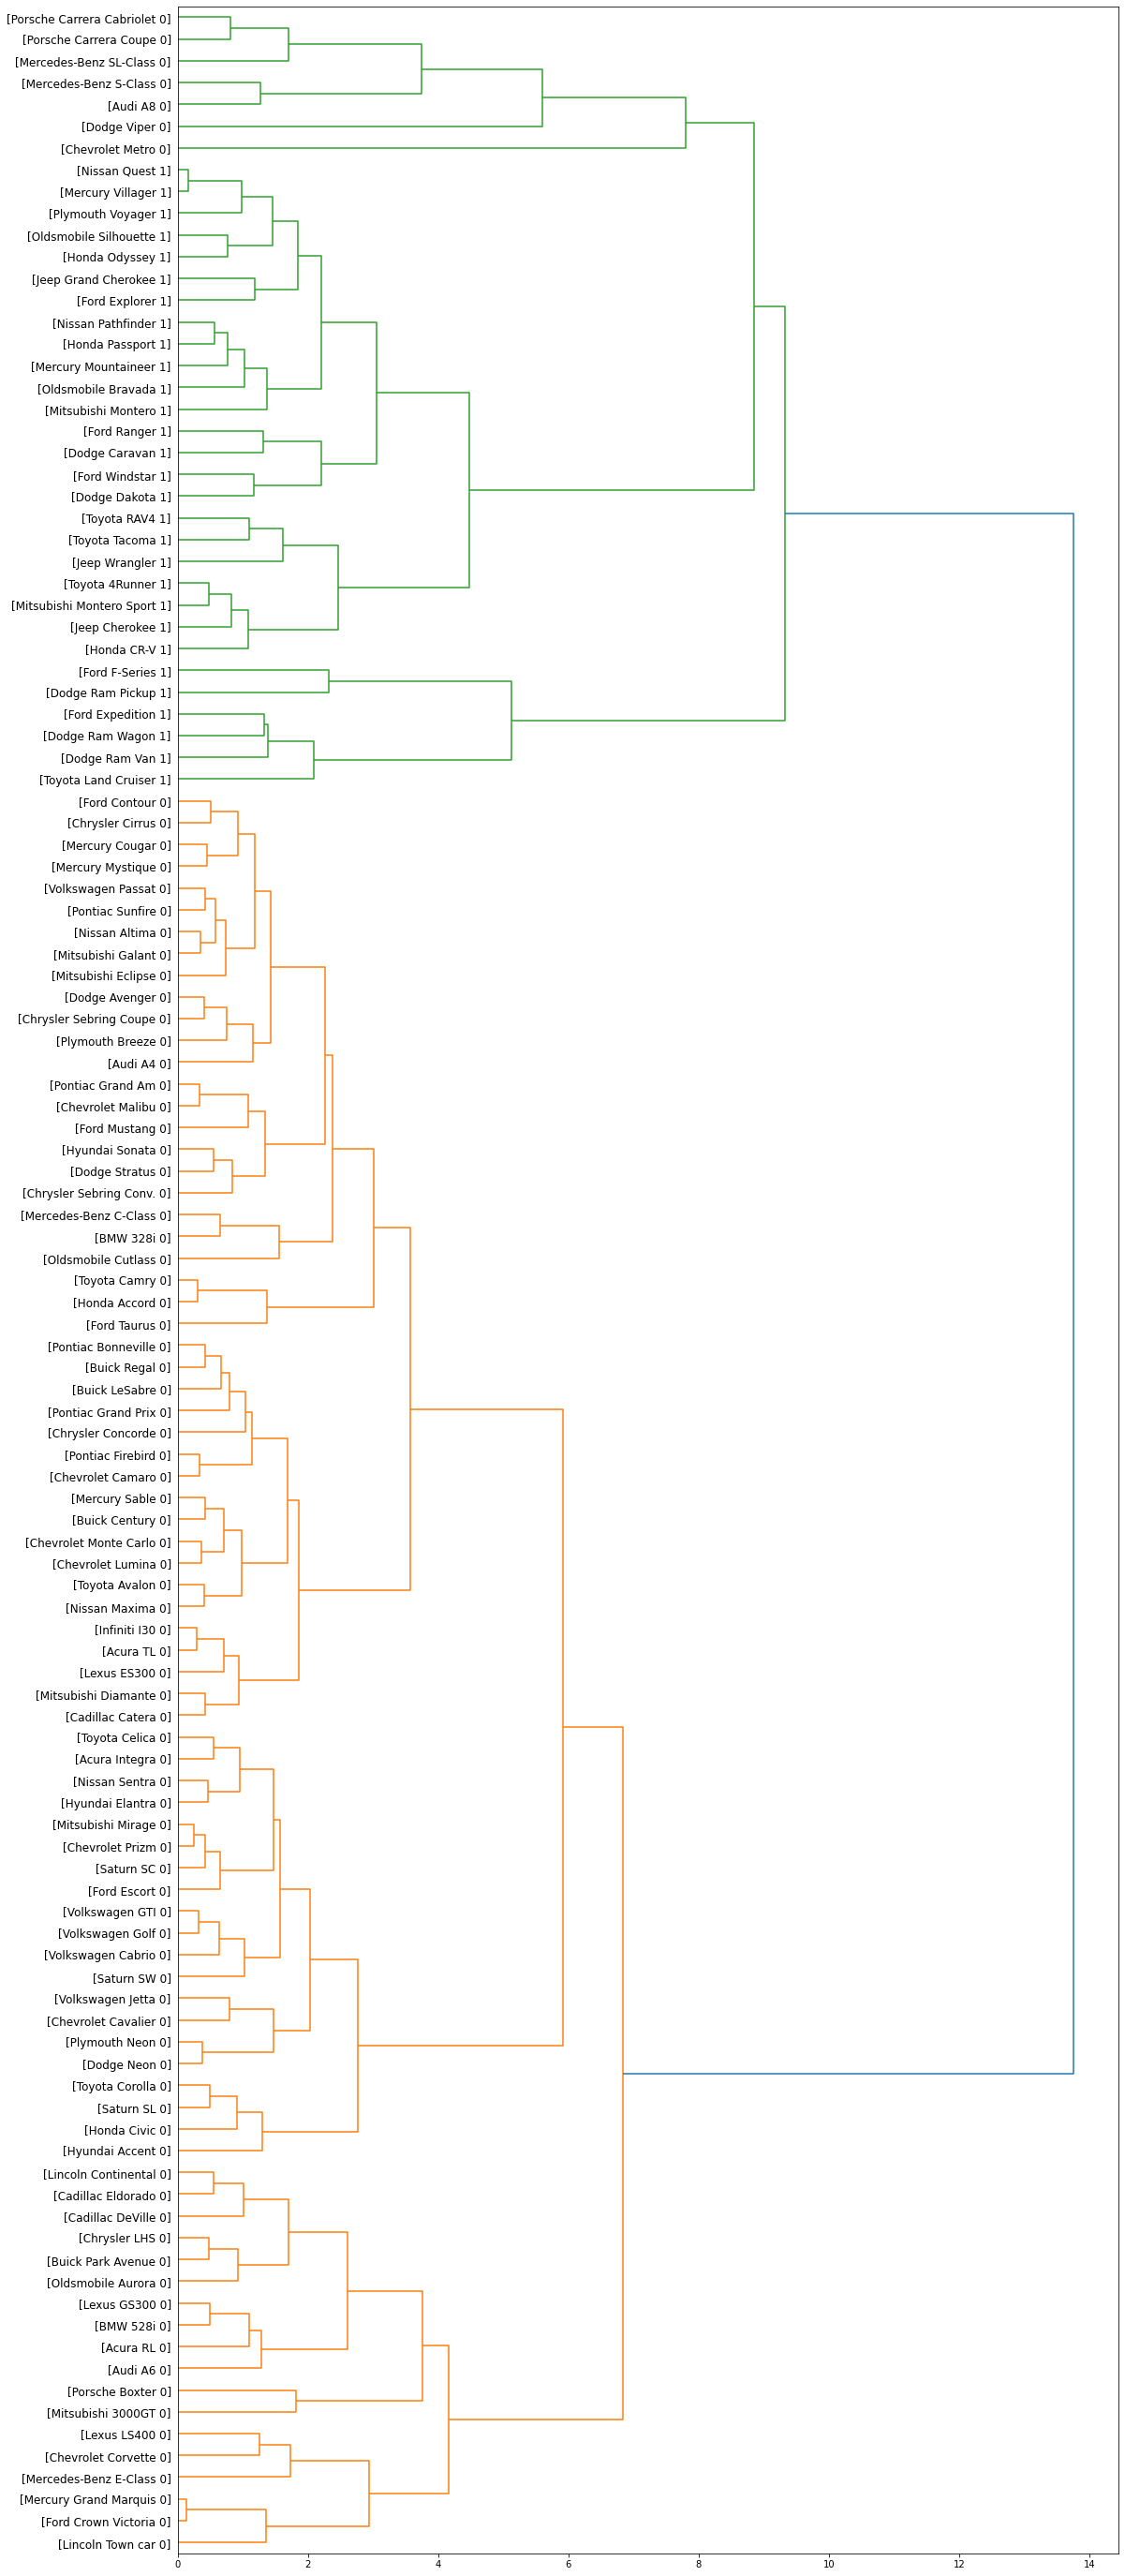

In [55]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['manufact'][id], data['model'][id], int(float(data['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [56]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/Users/polinariabar/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:492: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 5, 0, 5, 1, 0, 5, 0, 0, 5, 0, 5, 5, 0, 0, 0, 0, 0, 0, 5, 0,
       4, 0, 0, 0, 0, 5, 0, 0, 0, 1, 2, 2, 2, 3, 3, 0, 0, 0, 0, 5, 3, 3,
       2, 3, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 5, 5, 5, 5, 0, 0,
       0, 0, 5, 3, 3, 0, 0, 0, 5, 3, 3, 0, 5, 1, 1, 0, 0, 0, 3, 3, 0, 5,
       3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 2, 0, 0, 0, 0, 0])

In [57]:
data['clusters'] = agglom.labels_
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,clusters
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,5
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

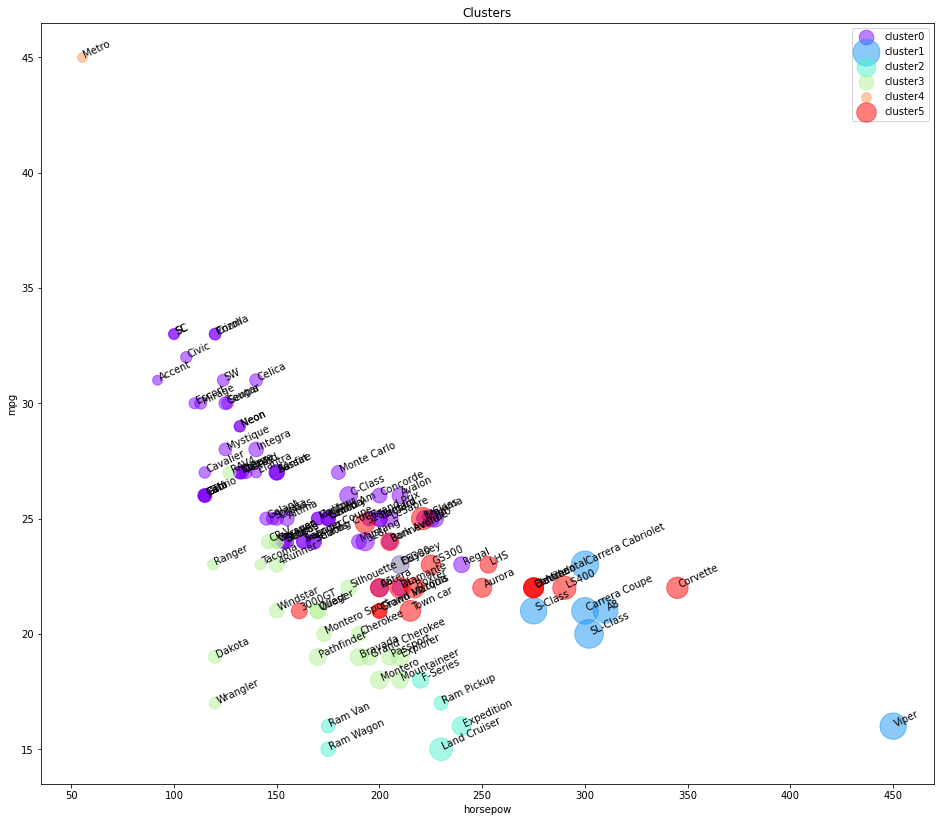

In [60]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.clusters == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [62]:
data.groupby(['clusters','type'])['clusters'].count()

clusters  type
0         0.0     63
1         0.0      6
2         1.0      6
3         1.0     23
4         0.0      1
5         0.0     18
Name: clusters, dtype: int64

In [65]:
agg_cars = data.groupby(['clusters','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-65-7340c4b1ee07>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = data.groupby(['clusters','type'])['horsepow','engine_s','mpg','price'].mean()


,,horsepow,engine_s,mpg,price
clusters,type,,,,
0,0.0,156.920635,2.534921,26.555556,19.490857
1,0.0,322.833333,4.716667,20.333333,71.669167
2,1.0,211.666667,4.483333,16.166667,29.024667
3,1.0,167.478261,3.095652,21.000000,22.811261
4,0.0,55.000000,1.000000,45.000000,9.235000
5,0.0,233.888889,3.866667,22.322222,37.358278


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

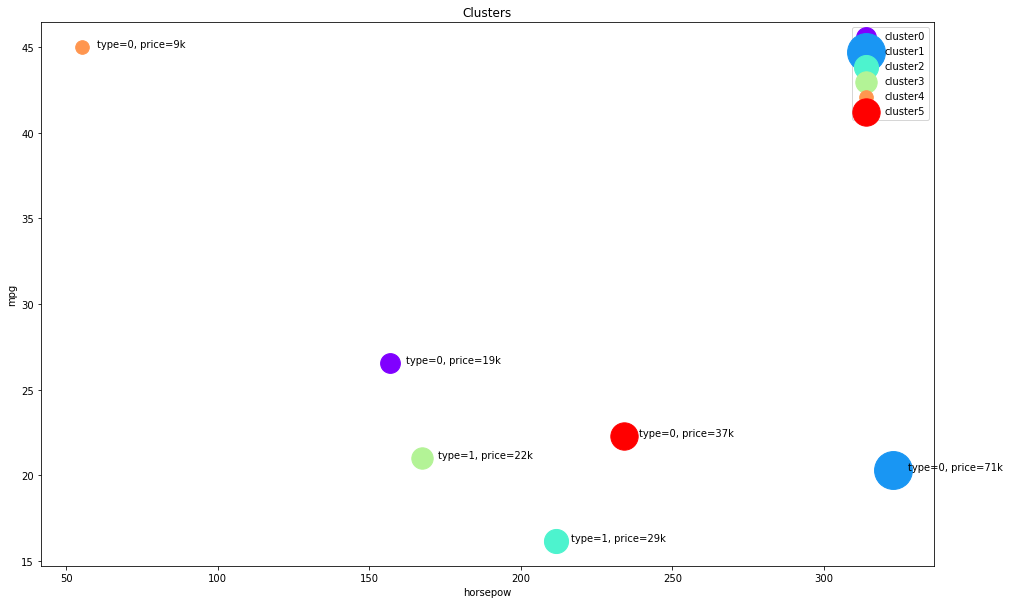

In [66]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
